In [1]:
import torchvision
import torchvision.datasets as datasets

In [2]:
dataset = datasets.ImageFolder(root="/home/data/core50")

In [29]:
import os
from torchvision.datasets.folder import default_loader, IMG_EXTENSIONS

class Core50(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None, loader=default_loader):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform
        self.samples = self.make_dataset(root)
        self.class_names = ["plug adapter", "mobile phone", "scissor", "light bulb", "can", "glasse", "ball", "marker", "cup", "remote control"]

    def find_classes(self, directory):
        class_names = ["plug adapter", "mobile phone", "scissor", "light bulb", "can", "glasse", "ball", "marker", "cup", "remote control"]
        mapping = {name: idx for idx, name in enumerate(class_names)}
        
        return class_names, mapping
    
    def make_dataset(self, directory, extensions=None):
        if extensions is None:
            extensions = IMG_EXTENSIONS
        
        sample_list = []

        for session_dir_name in os.listdir(directory):
            session_dir_path = os.path.join(directory, session_dir_name)
            for object_dir_name in os.listdir(session_dir_path):
                object_idx = int(object_dir_name.after("o")) - 1
                class_label = object_idx // 5
                object_dir_path = os.path.join(session_dir_path, object_dir_name)
                for image_name in os.listdir(object_dir_path):
                    image_path = os.path.join(object_dir_path, image_name)
                    sample_list.append((image_path, class_label))
        
        return sample_list


In [30]:
dataset = Core50(root="/home/data/core50")

In [31]:
dataset[0]

AttributeError: 'Core50' object has no attribute 'samples'

In [3]:
dataset.classes

['core50_350x350']

In [4]:
len(dataset)

165000

0


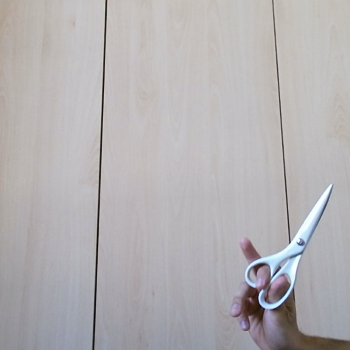

In [15]:
img, lbl = dataset[1000]
print(lbl)
img

In [23]:
val_dataset = datasets.ImageFolder(root="/home/data/places365/val")

In [24]:
len(val_dataset)

36500

In [1]:
import tensorflow_datasets as tfds

In [1]:
!pip install tensorflow tensorflow-datasets

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.1 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached googleapis_common_protos-1.66.0-py2.py3-none-any.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.7 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import os

2024-12-17 14:10:33.992521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734444634.038484 2915989 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734444634.052964 2915989 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 14:10:34.095927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Load the test split of the places365_small dataset
test_dataset = tfds.load('places365_small', split='test', as_supervised=True, data_dir="/home/data/tensorflow_datasets/")

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [ ]:

# Directory to save the images
output_dir = 'places365_test_images'
os.makedirs(output_dir, exist_ok=True)

# Function to save images
def save_image(image, label, index):
    image = tf.image.encode_jpeg(image)
    file_path = os.path.join(output_dir, f'image_{index}.jpg')
    tf.io.write_file(file_path, image)

# Iterate over the dataset and save images
for index, (image, label) in enumerate(tfds.as_numpy(test_dataset)):
    save_image(image, label, index)
    if index % 100 == 0:
        print(f'Saved {index} images')

print('Finished saving images')